Mixture Gaussian Example of Lindley 1972 in https://tminka.github.io/papers/minka-pathologies.pdf

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10)
using Optim

In [2]:
mixnormal(μ, σ) = MixtureModel([Normal(), Normal(μ, σ)], [0.5, 0.5])

mixnormal (generic function with 1 method)

In [3]:
n = 10
dist_true = mixnormal(4, 1.5)

MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.5000): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.5000): Normal{Float64}(μ=4.0, σ=1.5)


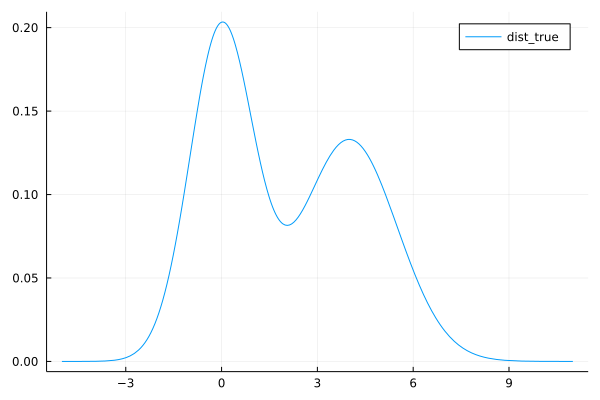

In [4]:
plot(x -> pdf(dist_true, x), -5, 11; label="dist_true")

In [5]:
#Random.seed!(45105963)
#@show X = sort(round.(rand(dist_true, n); digits=1))
X = [-0.8, -0.1, 0.3, 0.8, 1.1, 1.9, 2.8, 3.8, 5.3, 7.4]
@show X;

X = [-0.8, -0.1, 0.3, 0.8, 1.1, 1.9, 2.8, 3.8, 5.3, 7.4]


In [6]:
loglik(μ, t) = loglikelihood(mixnormal(μ, exp(t)), X)
lik(μ, t) = exp(loglik(μ, t))

lik (generic function with 1 method)

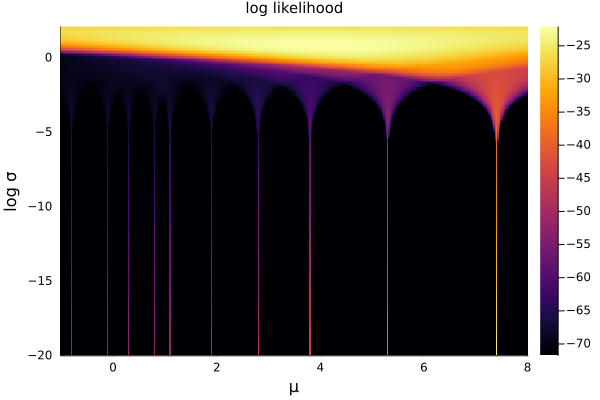

In [7]:
μ = range(-1, 8, 361)
t = range(-20, 2, 200)
heatmap(μ, t, loglik)
title!("log likelihood")
plot!(; xguide="μ", yguide="log σ")

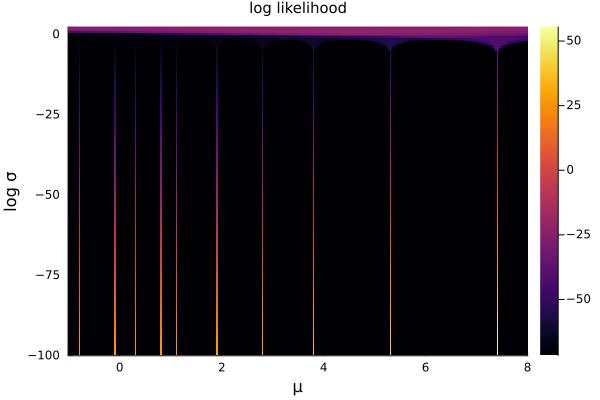

In [8]:
μ = range(-1, 8, 361)
t = range(-100, 2, 200)
heatmap(μ, t, loglik)
title!("log likelihood")
plot!(; xguide="μ", yguide="log σ")

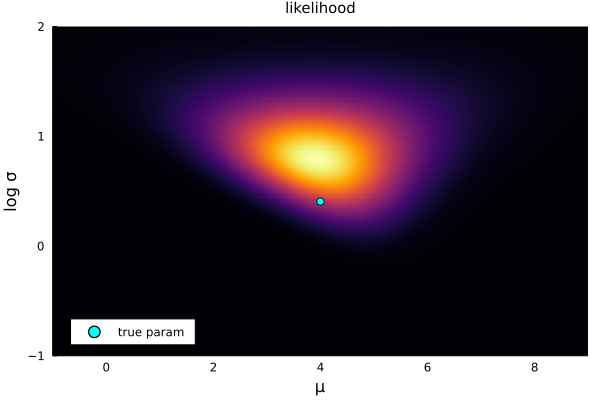

In [9]:
μ = range(-1, 9, 361)
t = range(-1, 2, 200)
heatmap(μ, t, lik; xlim=extrema(μ), ylim=extrema(t), colorbar=false)
title!("likelihood")
plot!(; xguide="μ", yguide="log σ")
scatter!([4], [log(1.5)]; c=:cyan, label="true param", legend=:bottomleft)

In [10]:
@show o = optimize(x -> -loglik(x...), [4.0, 1.0])
o.minimizer[1], exp(o.minimizer[2])

o = optimize((x->begin
                #= In[10]:1 =#
                -(loglik(x...))
            end), [4.0, 1.0]) =  * Status: success

 * Candidate solution
    Final objective value:     2.209183e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    32
    f(x) calls:    62



(3.9283458461727987, 2.208167456054178)

In [11]:
for k in eachindex(X)
    o = optimize(x -> -loglik(x...), [X[k], -50])
    @show k, X[k], o.minimizer[1], exp(o.minimizer[2])
end

(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (1, -0.8, -0.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (2, -0.1, -0.1, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (3, 0.3, 0.3, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (4, 0.8, 0.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (5, 1.1, 1.1, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (6, 1.9, 1.9, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (7, 2.8, 2.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (8, 3.8, 3.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (9, 5.3, 5.3, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (10, 7.4, 7.4, 2.746446979337455e-33)


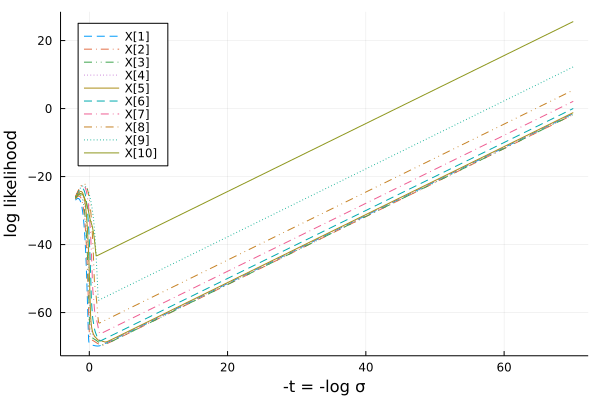

In [12]:
P = plot(; legend=:topleft)
for k in eachindex(X)
    plot!(t -> loglik(X[k], -t), -2, 70; label="X[$k]", ls=:auto)
end
plot!(xguide="-t = -log σ", yguide="log likelihood")

In [13]:
@show X[1]
@eval @show lik($(X[1]), log(7.5e-28))
@show likelihood_of_true_param = lik(4, log(1.5))
@show lik(X[1], log(7.5e-28)) / likelihood_of_true_param;

X[1] = -0.8
lik(-0.8, log(7.5e-28)) = 0.00012238025033768846
likelihood_of_true_param = lik(4, log(1.5)) = 1.212427318793967e-10
lik(X[1], log(7.5e-28)) / likelihood_of_true_param = 1.0093821579294608e6
